# Conformance Checking for Real Eventlogs and Sublogs after clustering

In [13]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from typing import List
from practical.ProcessMining.group1.task4.tokenreplay import TokenReplay
from practical.ProcessMining.group1.task4.comparison import ModelComparator
from practical.ProcessMining.group1.task4.comparison import ModelComparator4D 
from practical.ProcessMining.group1.shared import utils
from practical.ProcessMining.group1.shared.visualizer import Visualizer
import os

In [14]:
BASE = utils.SAMPLES_PATH

def get_path(file):
    return str(BASE / file)

clustered_LOGS = get_path("simple_event_logs_modified.txt")

def get_logs(file_path):
   return utils.import_csv(file_path)

def custom_to_pm4py_log(log):
    log = utils.event_log_to_pm4py_dataframe(log)
    return log_converter.to_event_log.apply(log)

In [15]:
def compare_base_real_logs(csv_file, x_dim, y_dim, threshold_imf):
    path = get_path(csv_file)
    print('file_path ======', path)
    log = utils.import_csv(path)
    event_log = log_converter.to_event_log.apply(log)

    miners = init_miners_with_log(event_log, threshold_imf)

    plot_miner_scatter(miners, 'Basic_real_eventlog', x_dim, y_dim)
    plot_miner_scatter_4d(miners, 'Basic_real_eventlog_with_4d', x_dim, y_dim)

In [16]:
def compare_sub_logs(sublogs_path, x_dim, y_dim, threshold_imf):
    for i in range(10):
       file_path = os.path.join(sublogs_path, f'cluster_{i}.csv')
       print('file_path ======', file_path)
       log = utils.import_csv(file_path)
       event_log = log_converter.to_event_log.apply(log)
       miners = init_miners_with_log(event_log,threshold_imf)
       plot_miner_scatter(miners, 'sublogs_' + str(i) + '_with_4d', x_dim, y_dim)
       plot_miner_scatter_4d(miners, 'Basic_real_eventlog_with_4d', x_dim, y_dim)

In [17]:
def init_miners_with_log(event_log,threshold_imf) -> List[TokenReplay]:
    # Alpha
    net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(event_log)
    # Heuristic
    net_heuristic, im_heuristic, fm_heuristic = pm4py.discover_petri_net_heuristics(event_log)
    # Inductive
    net_inductive, im_inductive, fm_inductive = pm4py.discover_petri_net_inductive(event_log)
    # Inductive Frequent
    net_inductive_inf, im_inductive_inf, fm_inductive_inf = pm4py.discover_petri_net_inductive(event_log, noise_threshold=threshold_imf)

    m1 = TokenReplay(event_log, net_alpha, im_alpha, fm_alpha, "AM")
    m2 = TokenReplay(event_log, net_heuristic, im_heuristic, fm_heuristic, "HM")
    m3 = TokenReplay(event_log, net_inductive, im_inductive, fm_inductive, "IM")
    m4 = TokenReplay(event_log, net_inductive_inf, im_inductive_inf, fm_inductive_inf, "IMi")

    miners = [m1, m2, m3, m4]
    
    shuffled_log = m1.shuffle_activities()
    for miner in miners:
        get_visualizer(miner, shuffled_log)

    return miners

In [18]:
def plot_miner_scatter(miners, desc, x_dim, y_dim):
    comparator = ModelComparator(miners)

    print("===== Pareto Efficient Models for log:", desc, "=====")
    results = comparator.run(x_dimension=x_dim, y_dimension=y_dim)
    print(results)

In [19]:
def plot_miner_scatter_4d(miners, desc, x_dim, y_dim):
    comparator = ModelComparator4D(miners)

    print("===== Pareto Efficient Models with 4 Dimensions for log:", desc, "=====")
    # results = comparator.run(x_dimension=x_dim, y_dimension=y_dim)
    # print(results)
    
    comparator.run_4d()

In [20]:
def get_visualizer(miner, shuffled_log):
    print("MinerType", miner.net_type)
    miner.run(shuffled_log)
    tokens = miner.get_unconformity_tokens()

    vizard = Visualizer()
    graph = vizard.build_petri_net(
        miner.net, miner.initial_marking, miner.final_marking, tokens
    )
    vizard.display(graph)


## Here are the generated 4 Models for Real Event Logs and pareto efficiency 
(with IMf threshold 0.25)

file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/shared/example_files/DomesticDeclarations_cleansed.csv


replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

MinerType AM


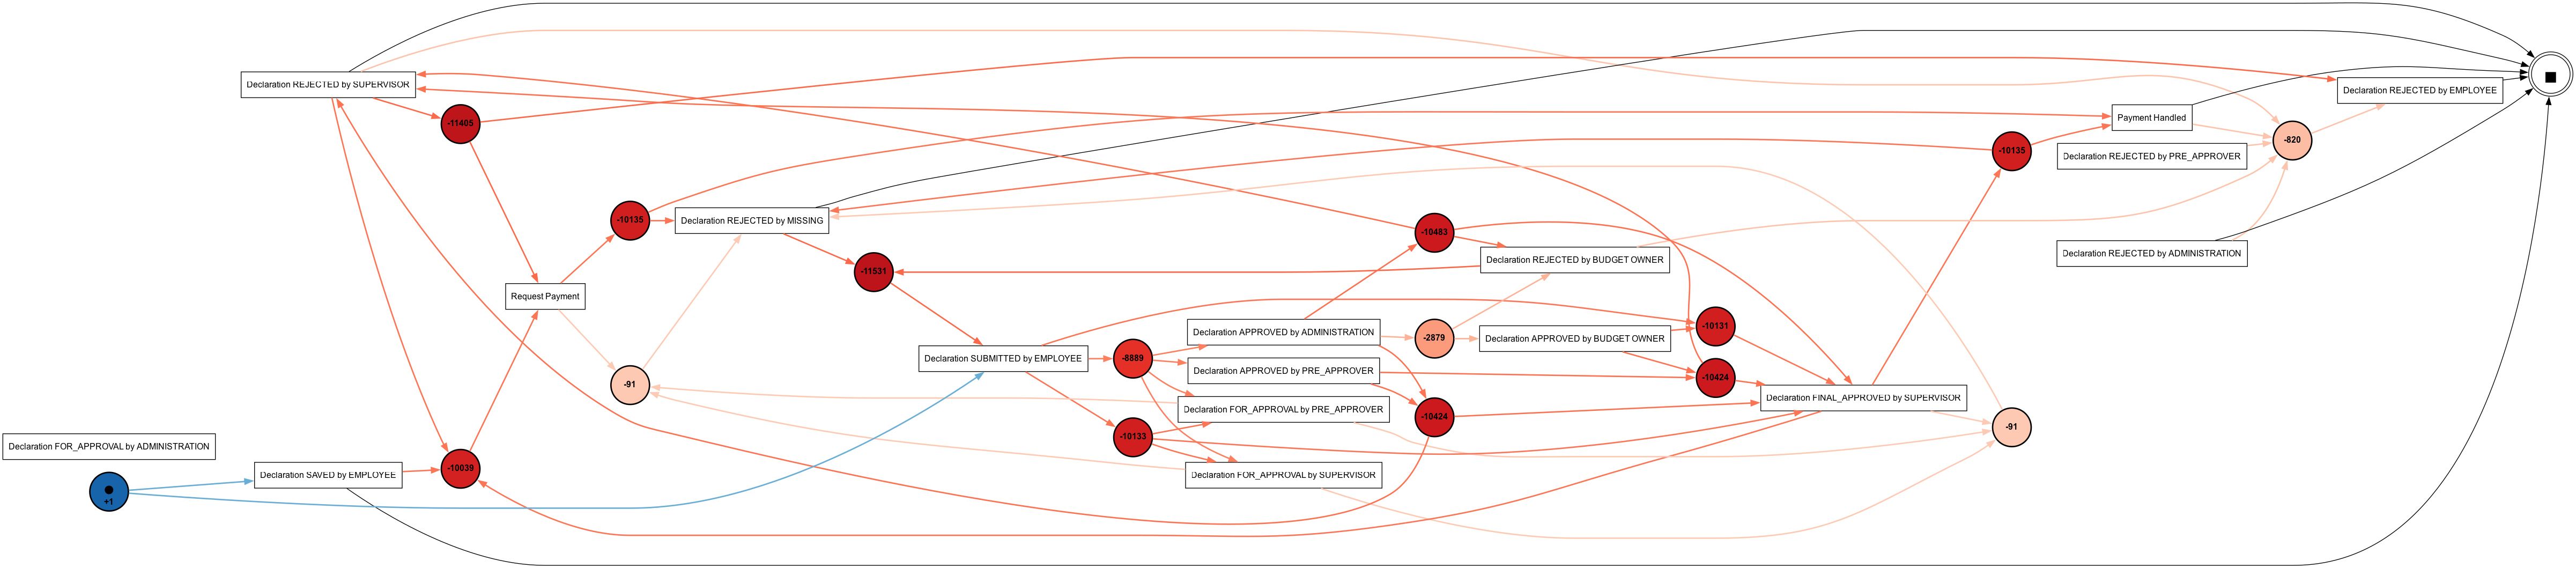

MinerType HM


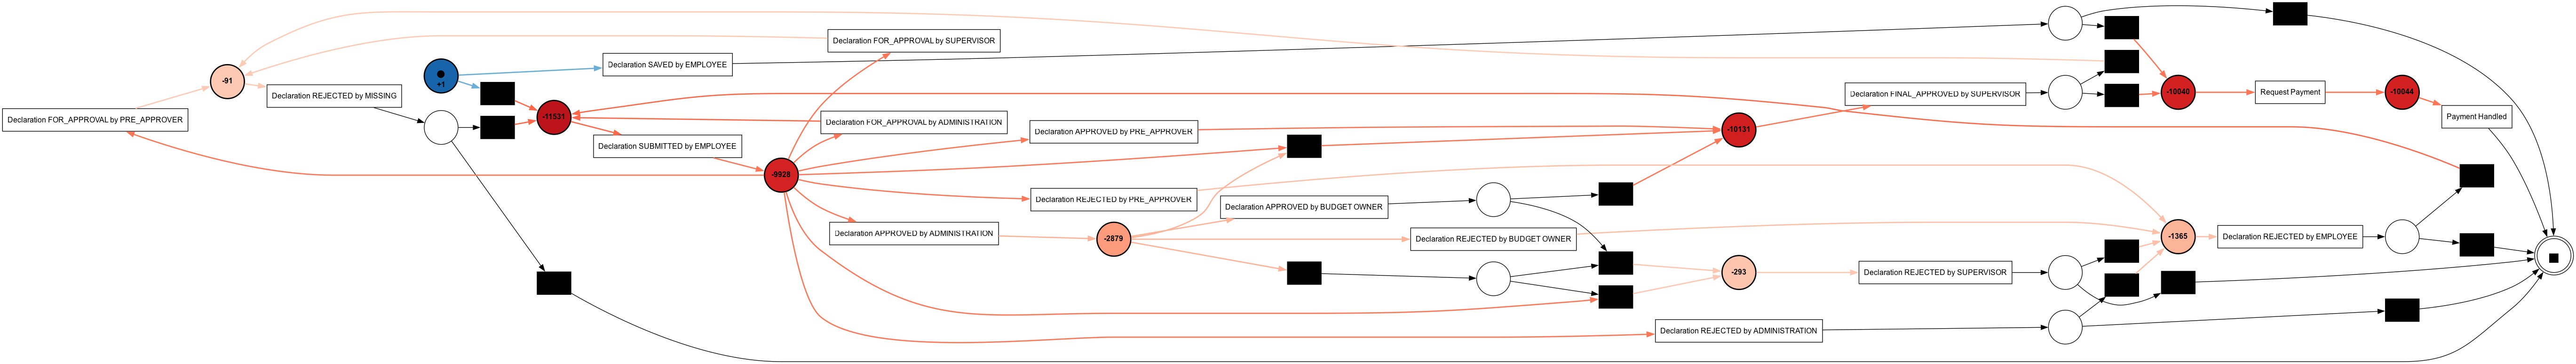

MinerType IM


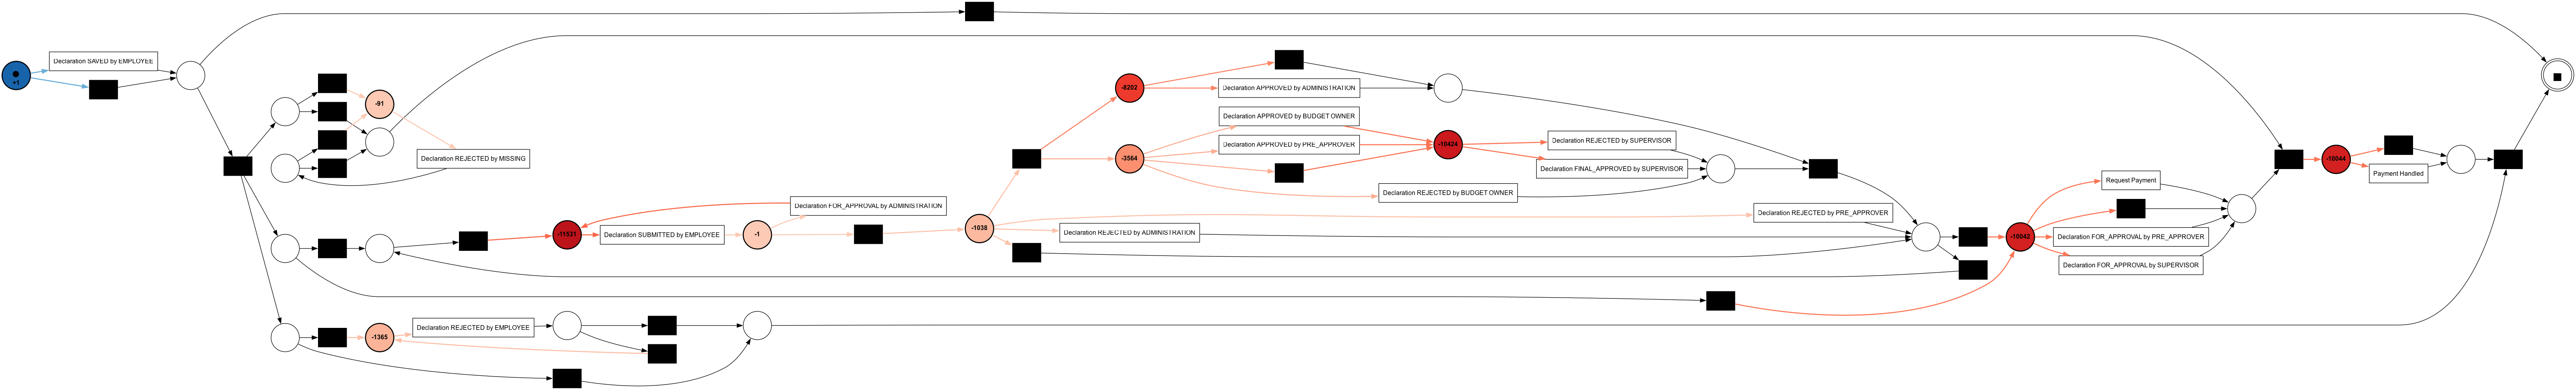

MinerType IMi


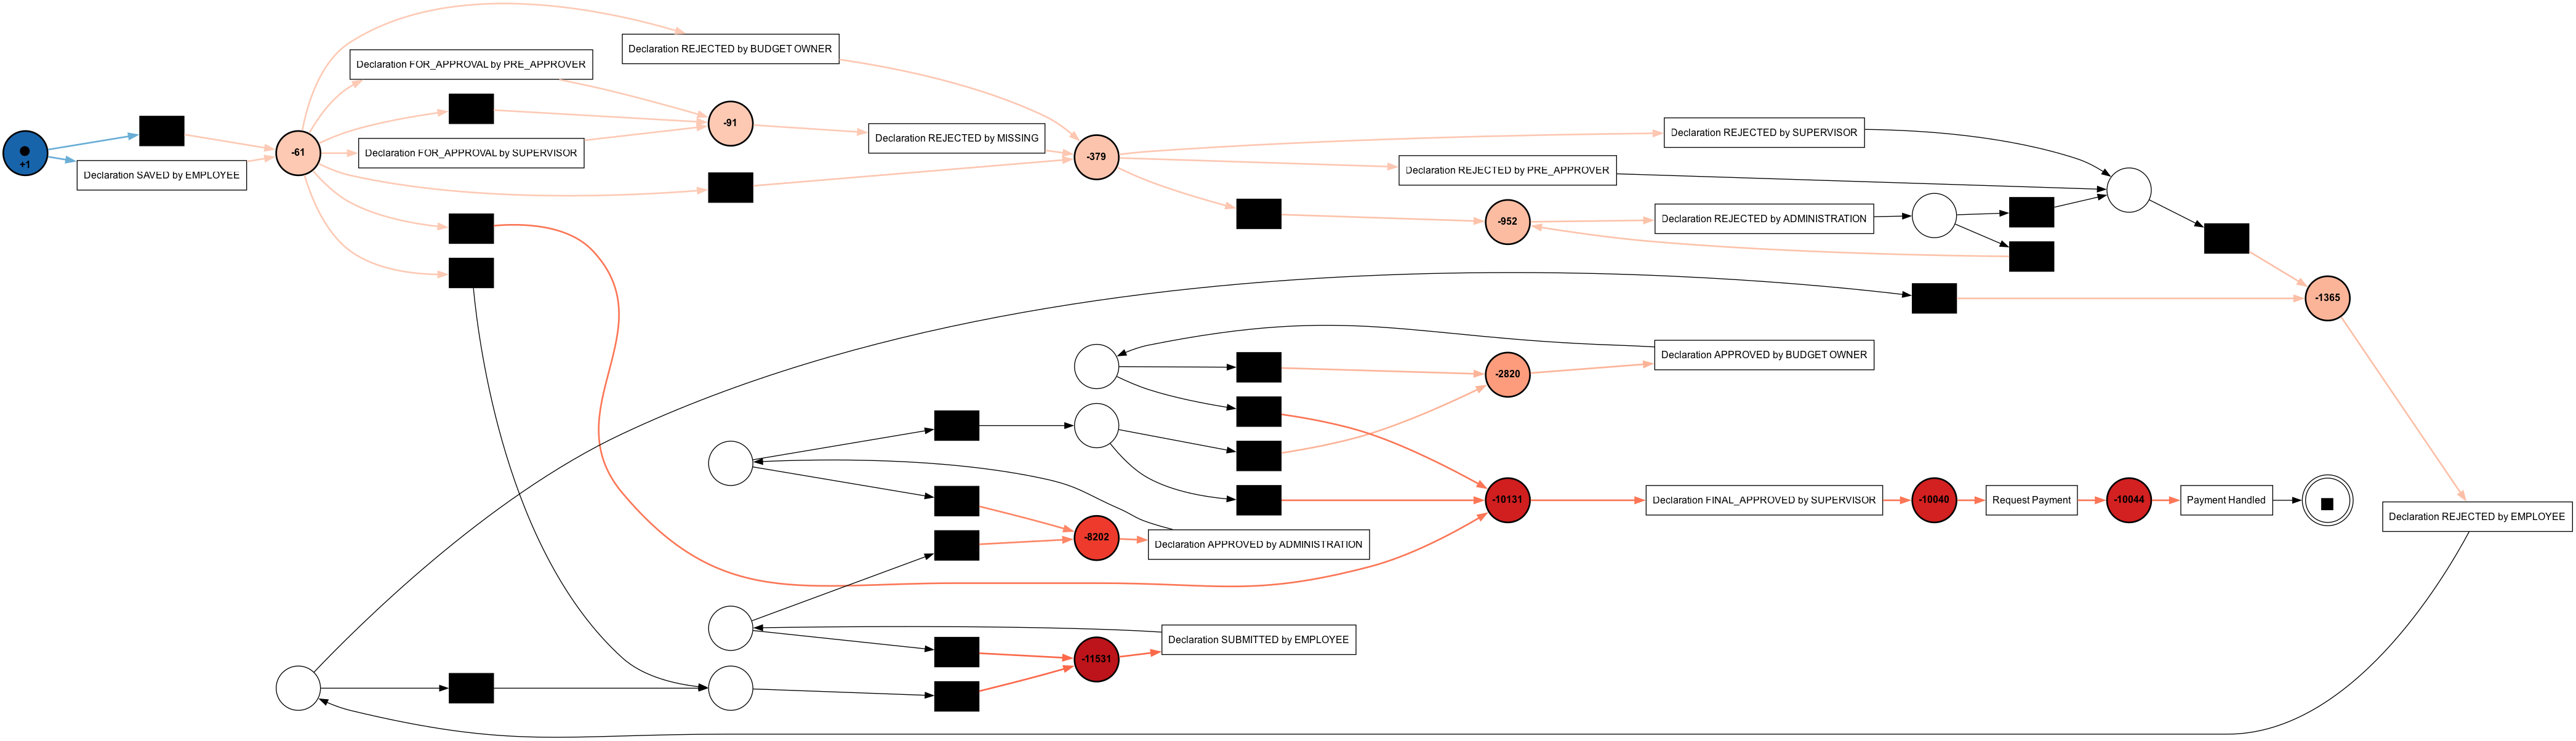

===== Pareto Efficient Models for log: Basic_real_eventlog =====


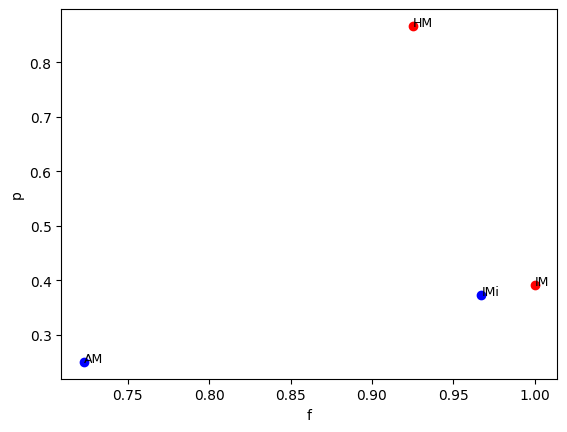

[{'type': 'HM', 'f': 0.9251912994498018, 'p': 0.8670356093278883}, {'type': 'IM', 'f': 1.0, 'p': 0.39080579250664294}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


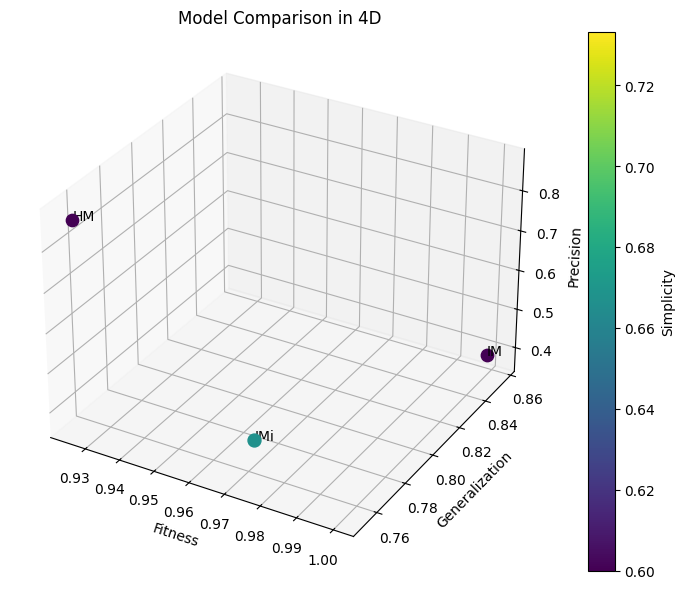

4D Pareto Efficient Models:  ['HM', 'IM', 'IMi']


In [21]:
compare_base_real_logs("DomesticDeclarations_cleansed.csv",'f','p',0.25)

## Here are the generated 4 Models for Real Event Logs and pareto efficiency 
(with IMf threshold 0.5)

file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/shared/example_files/DomesticDeclarations_cleansed.csv


replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

MinerType AM


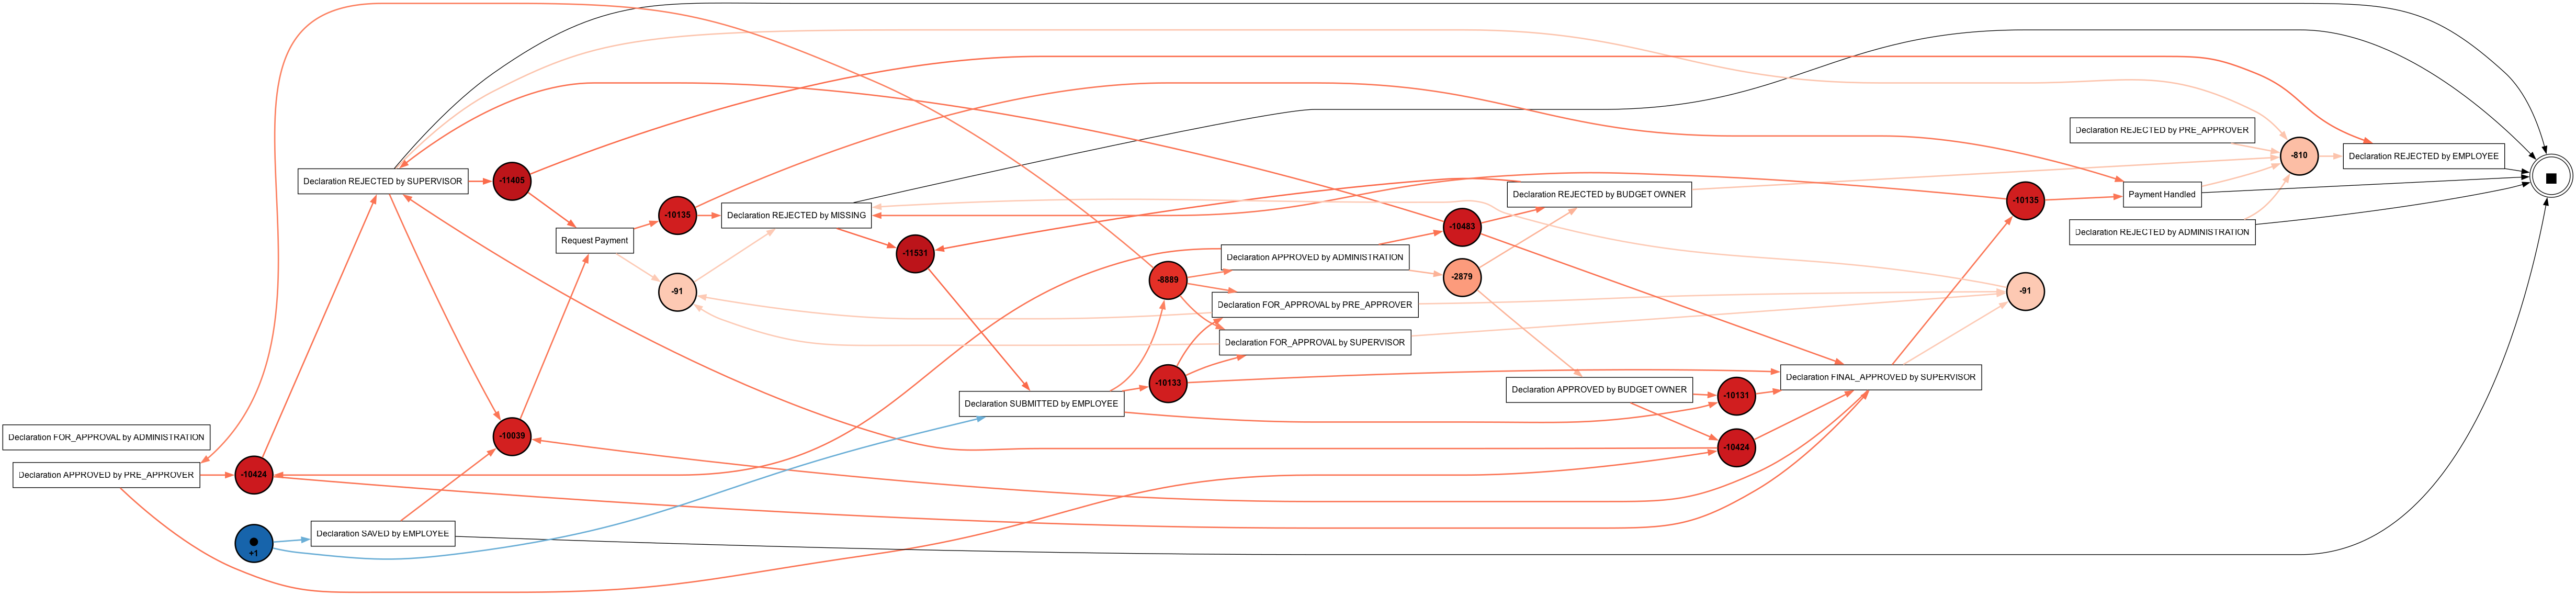

MinerType HM


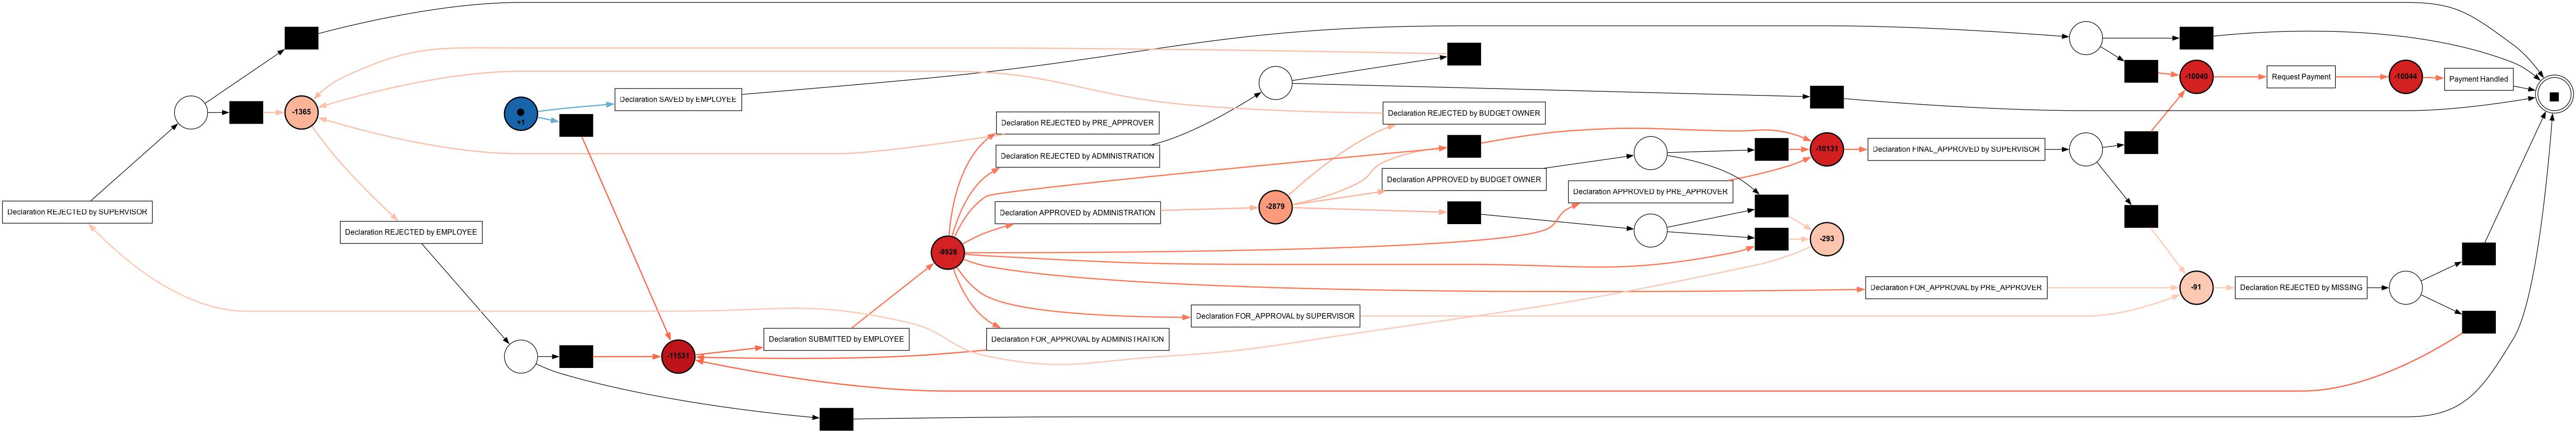

MinerType IM


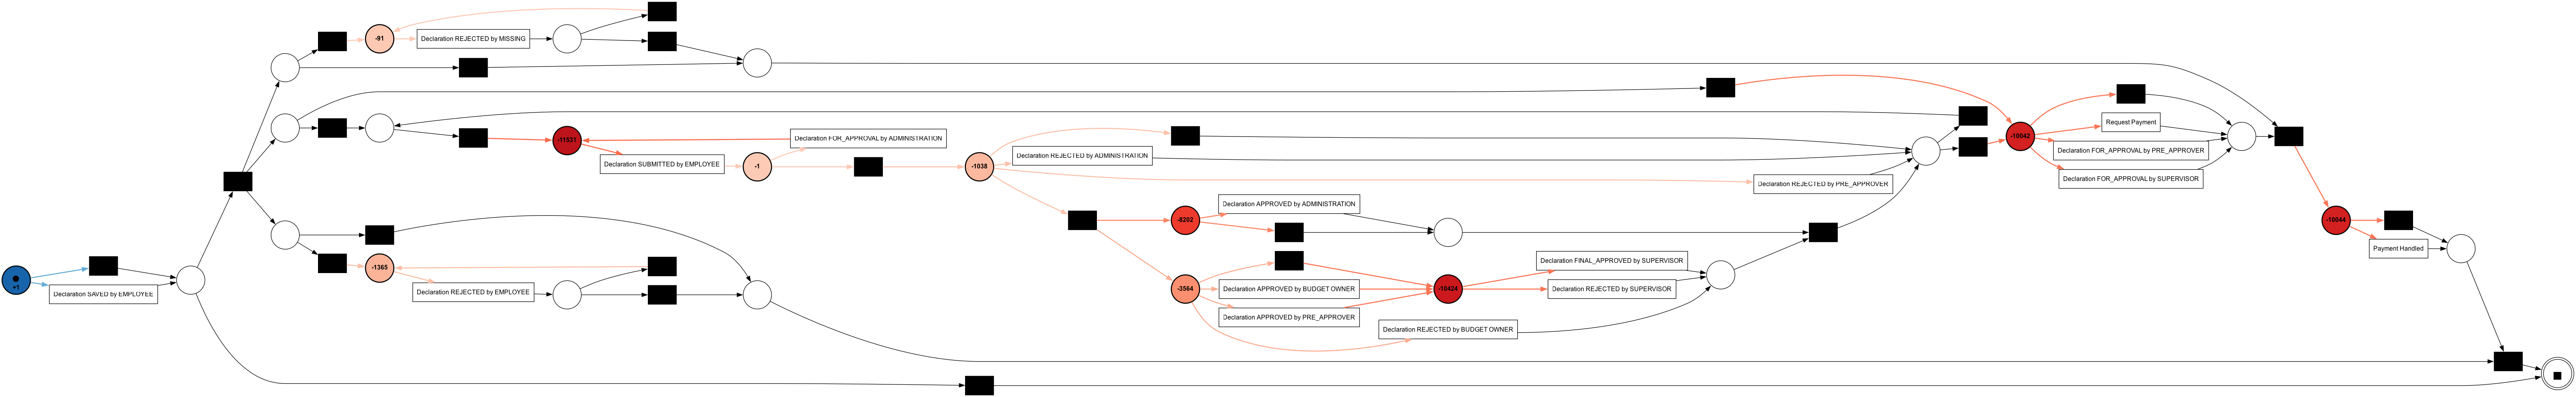

MinerType IMi


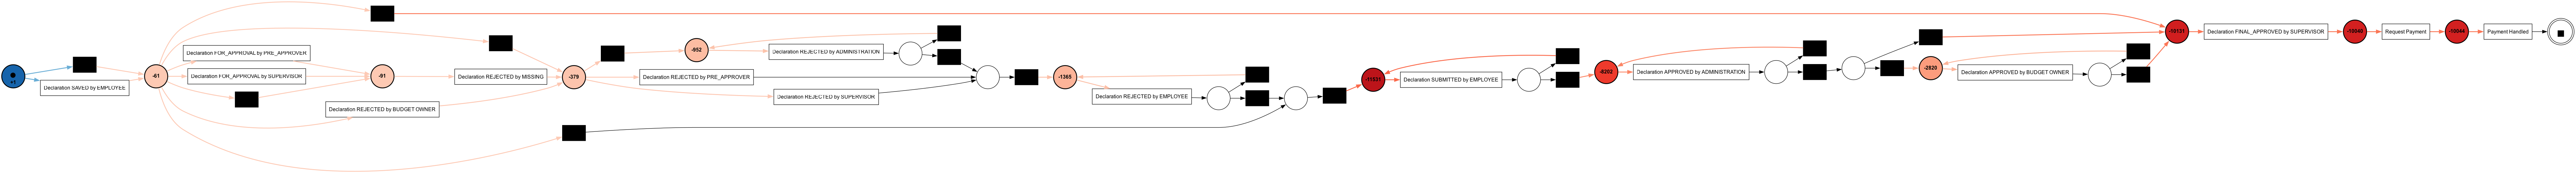

===== Pareto Efficient Models for log: Basic_real_eventlog =====


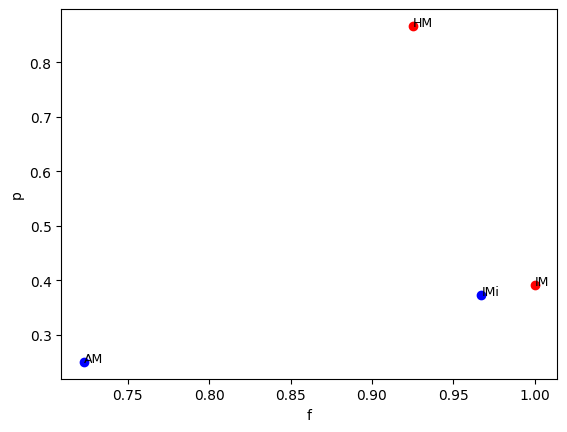

[{'type': 'HM', 'f': 0.9251912994498018, 'p': 0.8670356093278883}, {'type': 'IM', 'f': 1.0, 'p': 0.39080579250664294}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


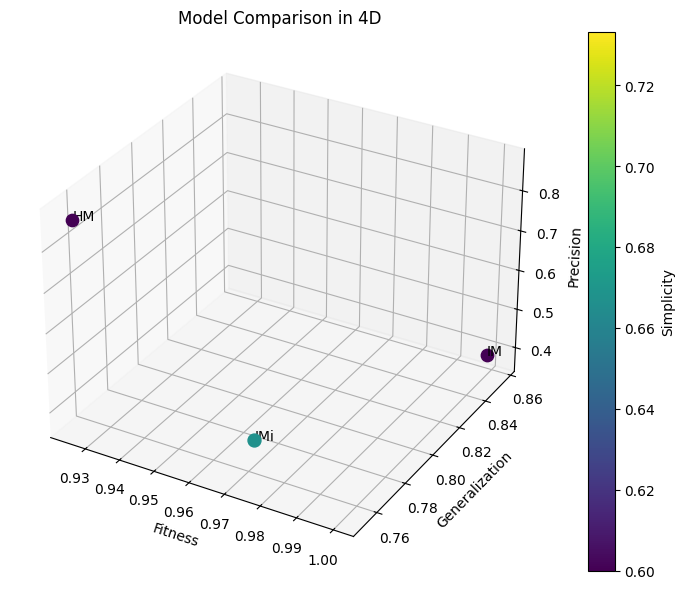

4D Pareto Efficient Models:  ['HM', 'IM', 'IMi']


In [22]:
compare_base_real_logs("DomesticDeclarations_cleansed.csv",'f','p',0.5)

## Here are the generated 4 Models for Real Event Logs and pareto efficiency
(with IMf threshold 0.75)

file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/shared/example_files/DomesticDeclarations_cleansed.csv


replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/324 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/99 [00:00<?, ?it/s]

MinerType AM


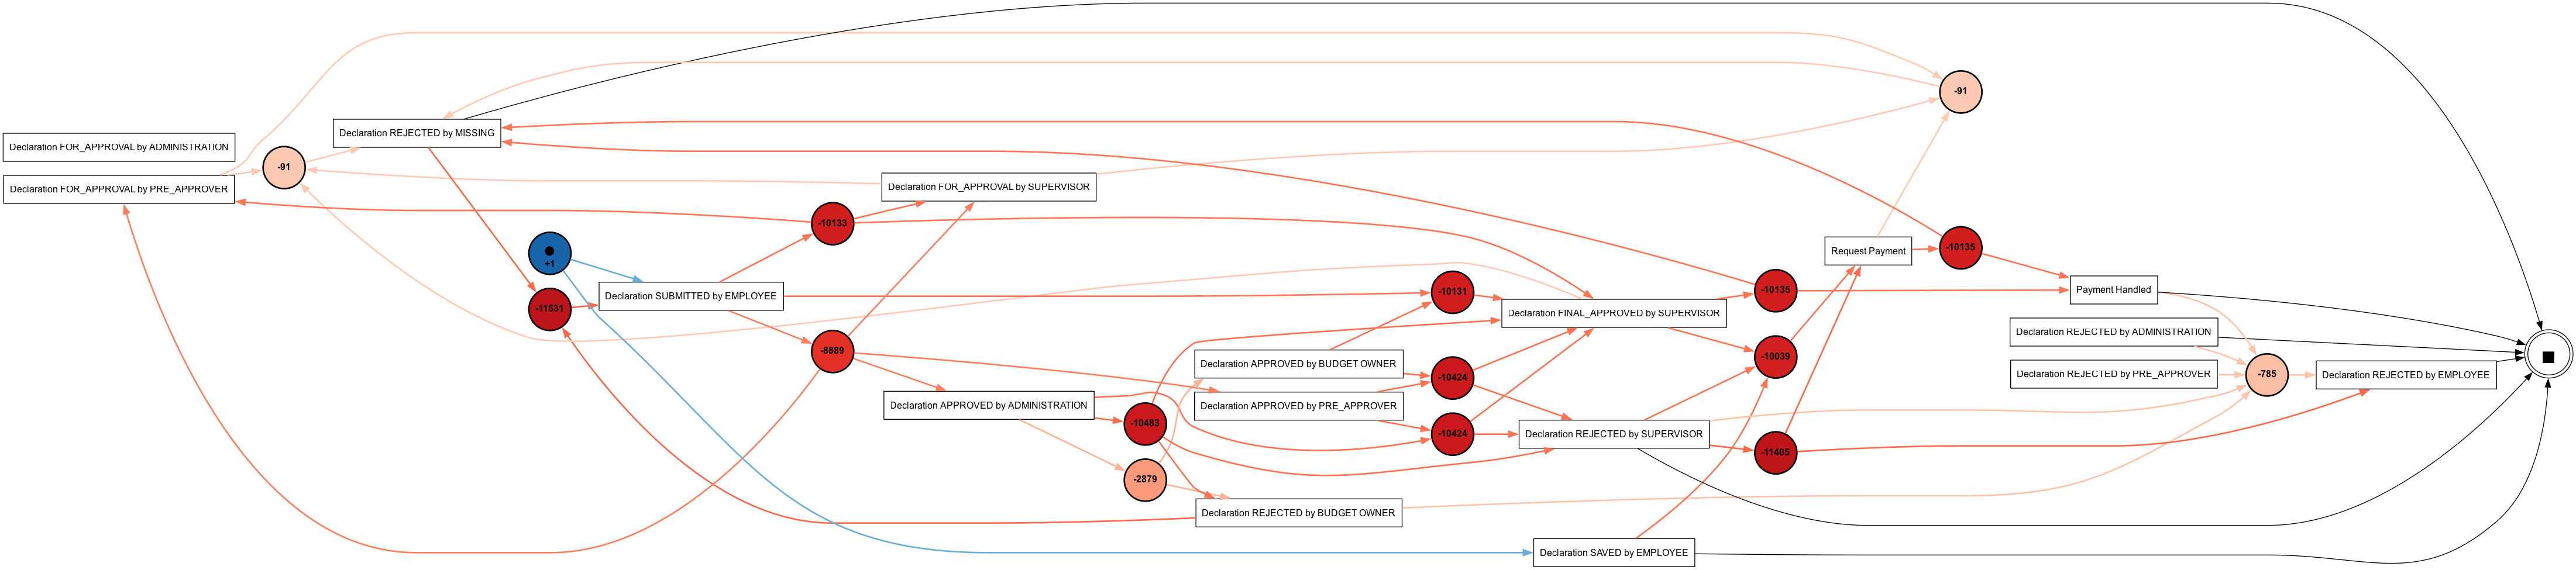

MinerType HM


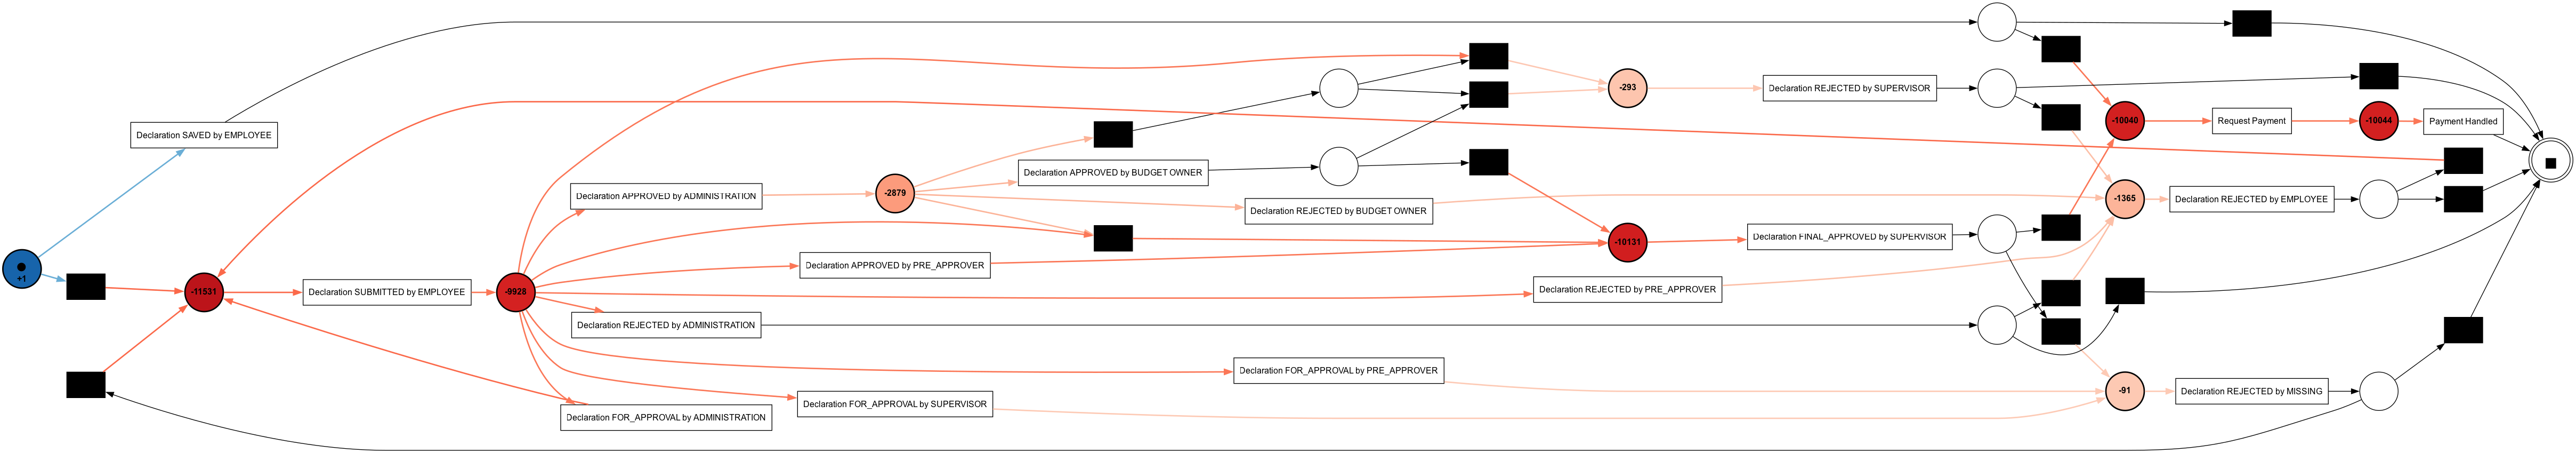

MinerType IM


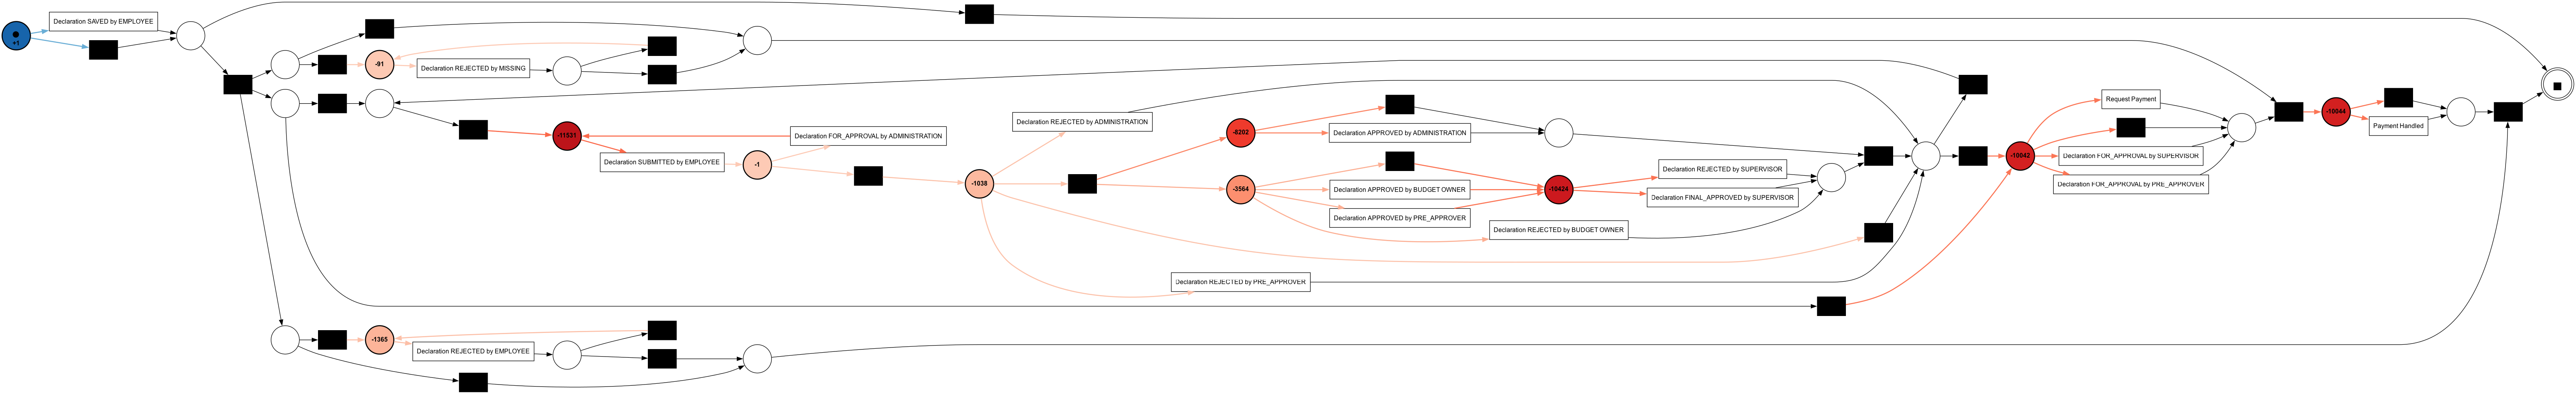

MinerType IMi


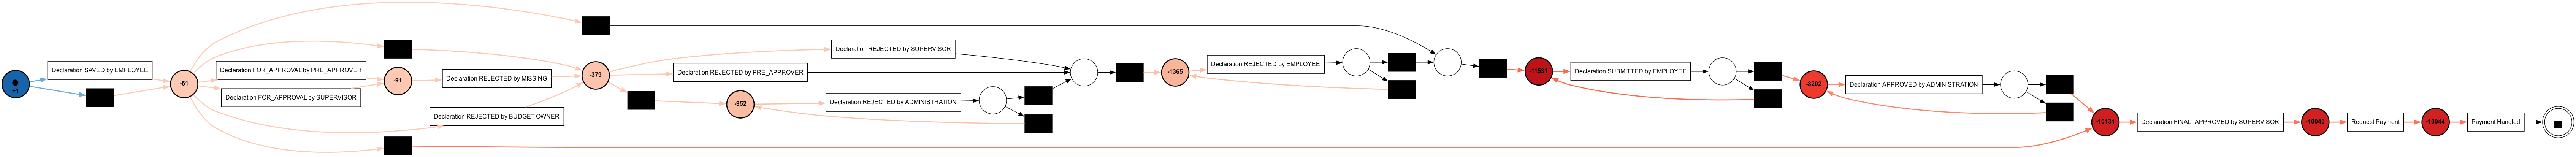

===== Pareto Efficient Models for log: Basic_real_eventlog =====


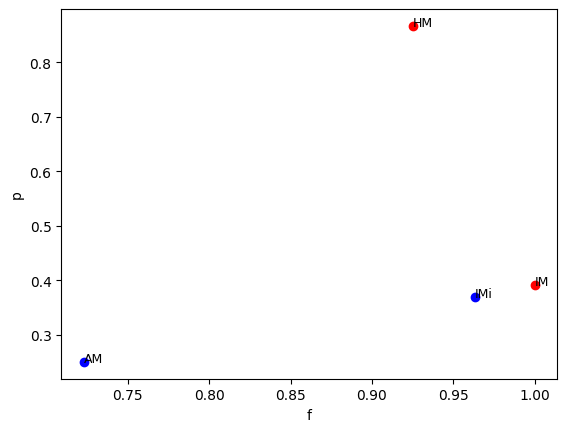

[{'type': 'HM', 'f': 0.9251912994498018, 'p': 0.8670356093278883}, {'type': 'IM', 'f': 1.0, 'p': 0.39080579250664294}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


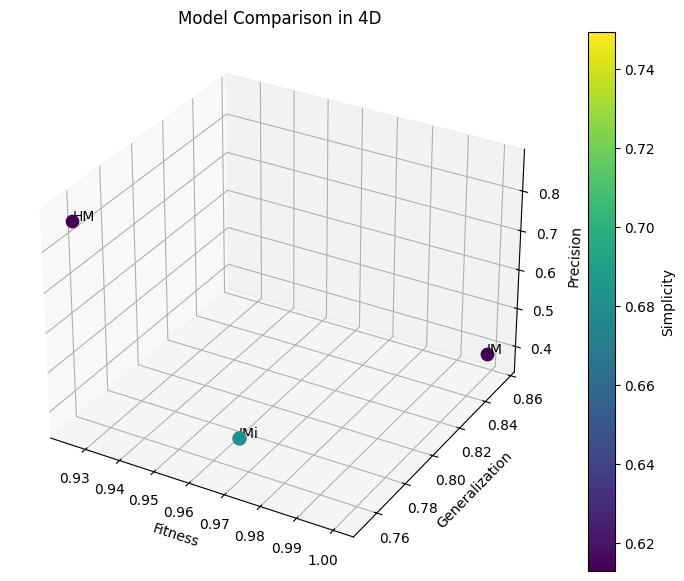

4D Pareto Efficient Models:  ['HM', 'IM', 'IMi']


In [23]:
compare_base_real_logs("DomesticDeclarations_cleansed.csv",'f','p',0.75)



## Here are the generated 4 Models for all Sub Logs

file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_0.csv


replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

MinerType AM


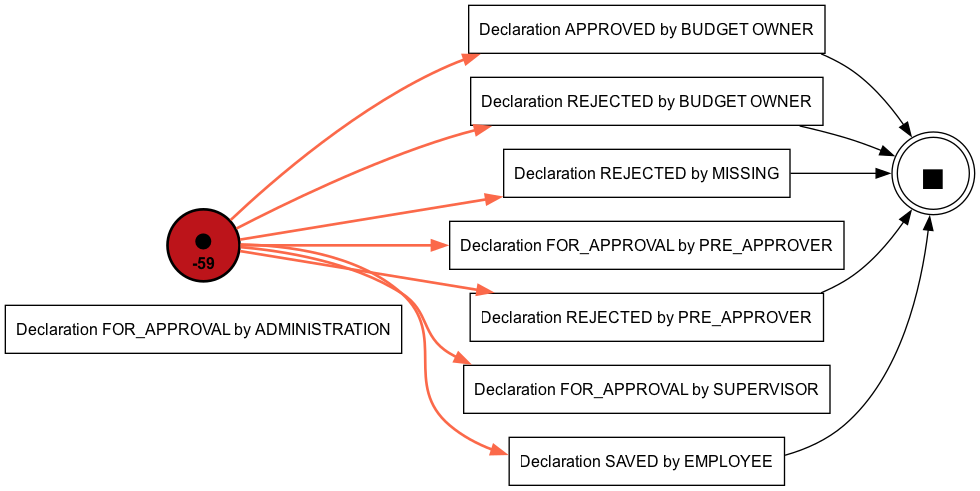

MinerType HM


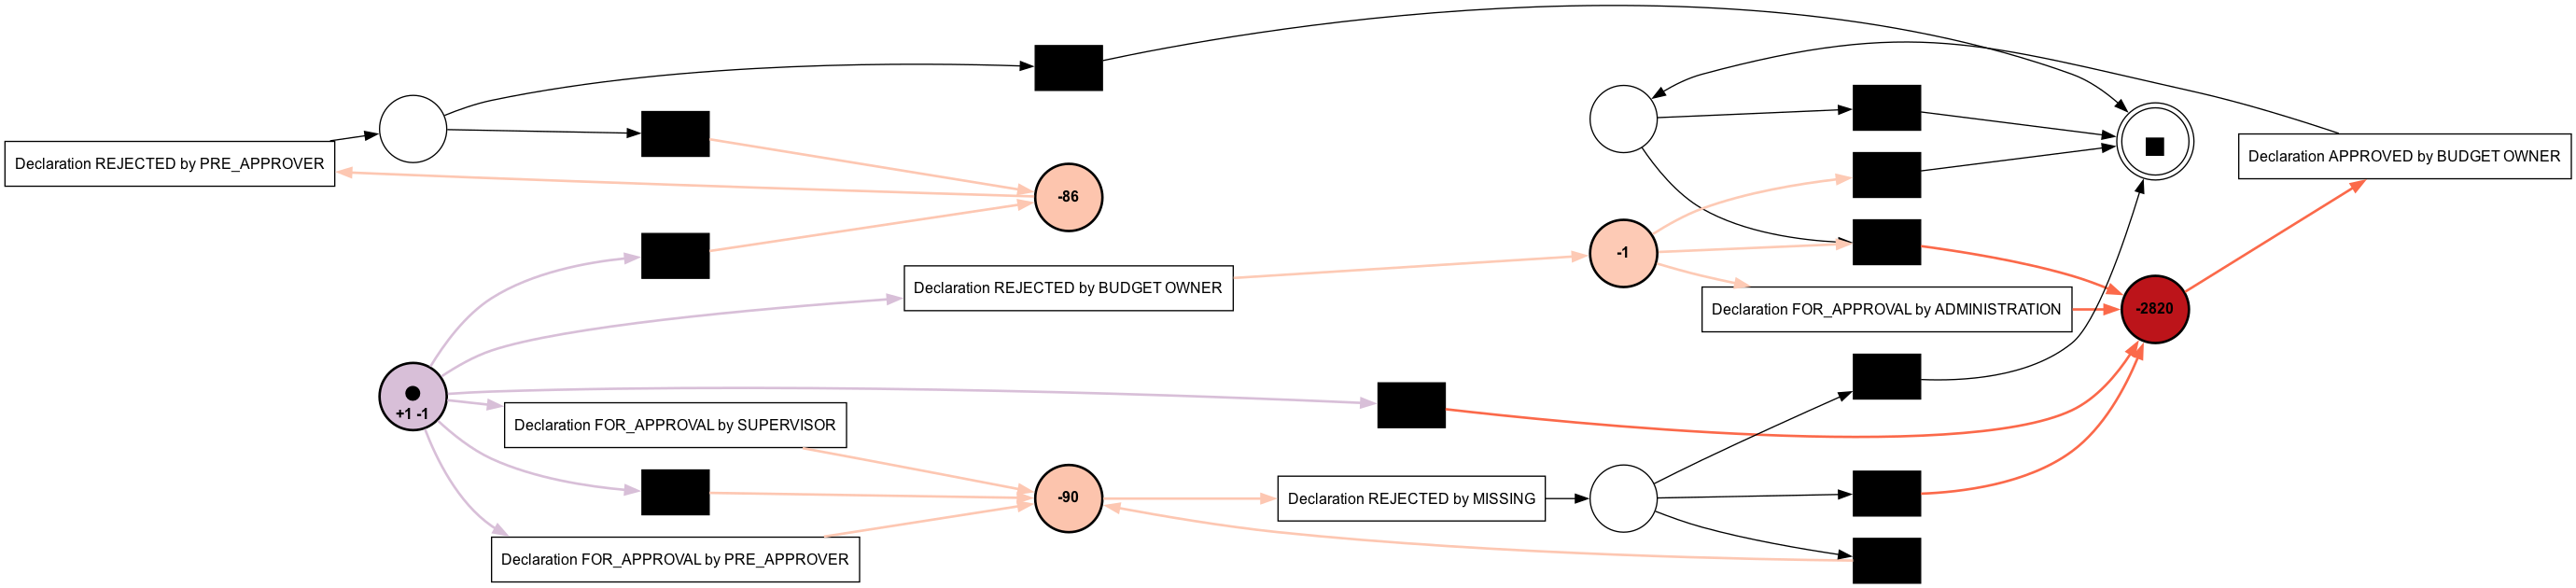

MinerType IM


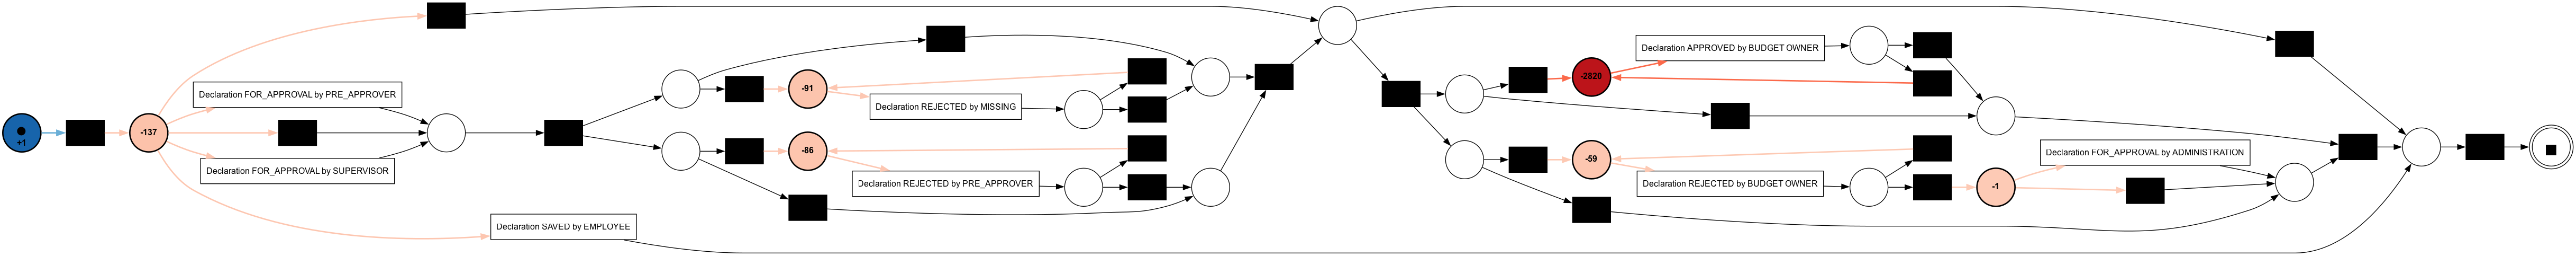

MinerType IMi


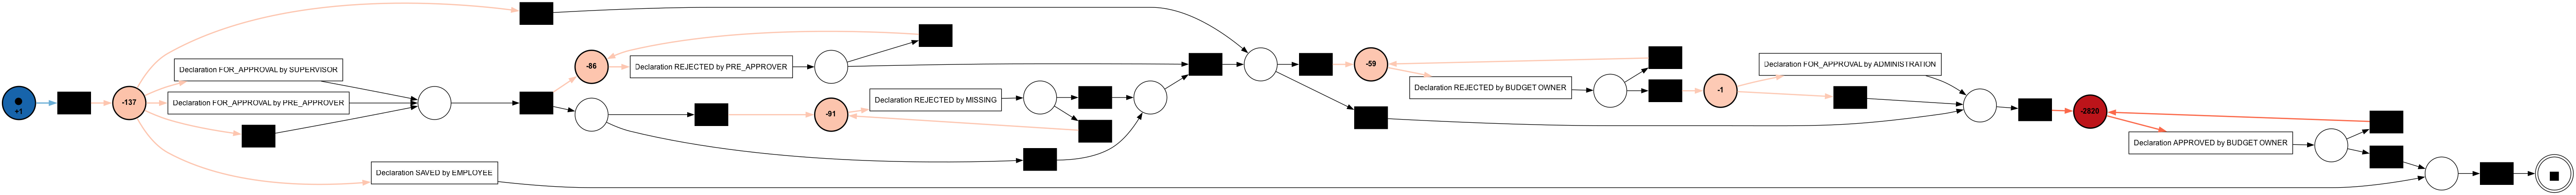

===== Pareto Efficient Models for log: sublogs_0_with_4d =====


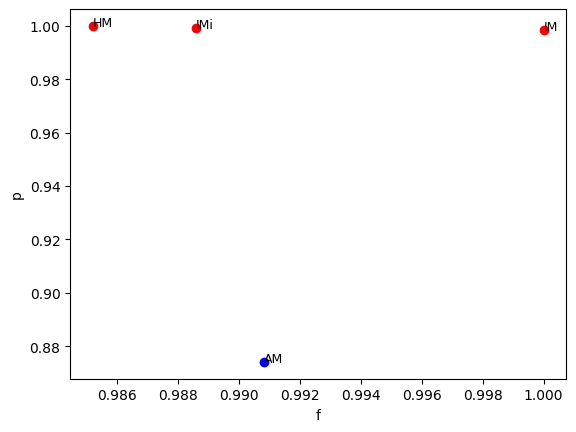

[{'type': 'HM', 'f': 0.9852196484236642, 'p': 0.999946963670114}, {'type': 'IM', 'f': 1.0, 'p': 0.9985532145763631}, {'type': 'IMi', 'f': 0.9885928527020785, 'p': 0.9991396875707493}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


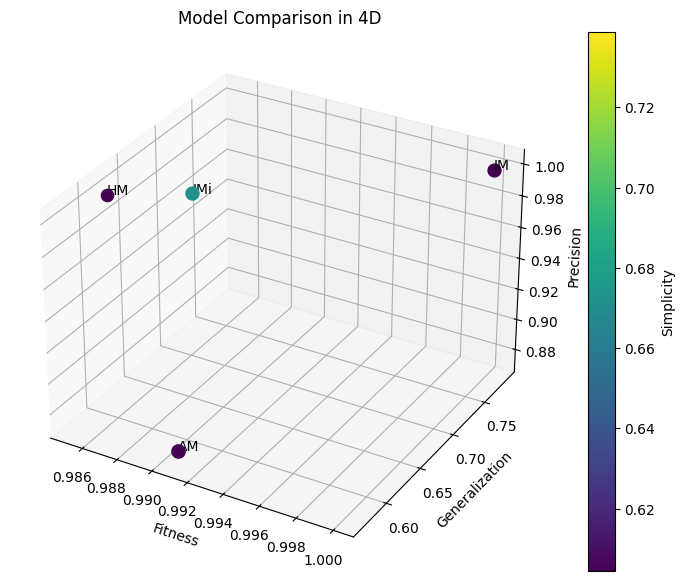

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_1.csv


replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

MinerType AM


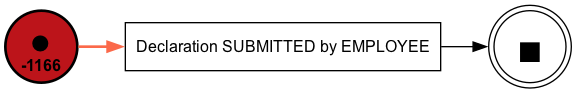

MinerType HM


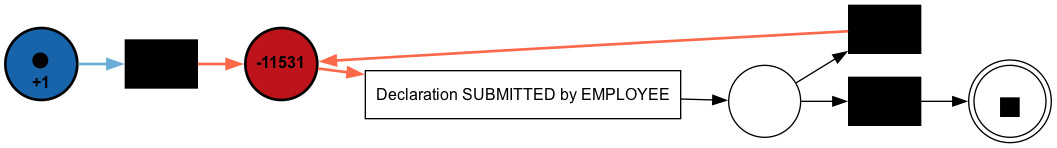

MinerType IM


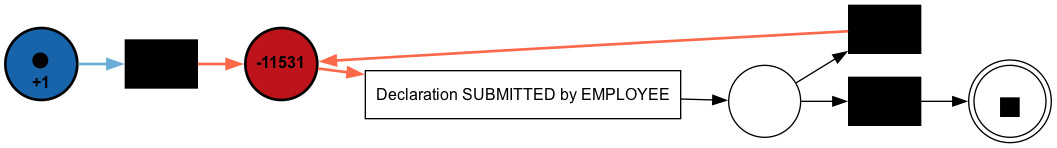

MinerType IMi


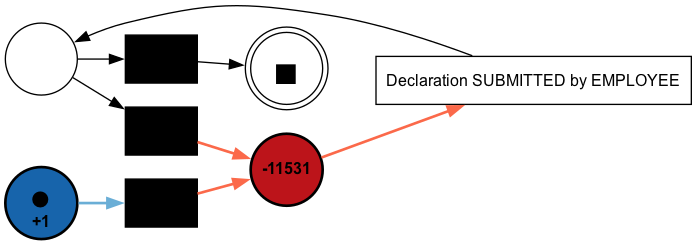

===== Pareto Efficient Models for log: sublogs_1_with_4d =====


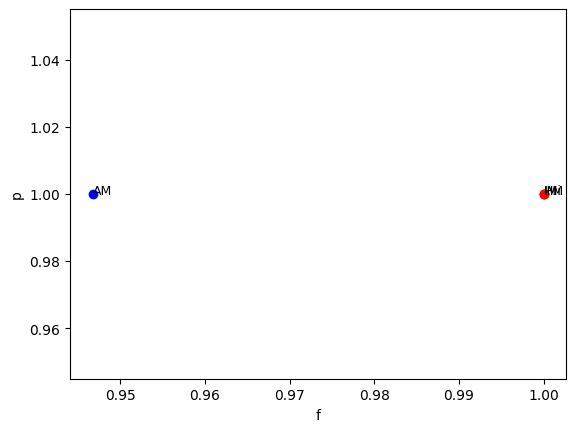

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


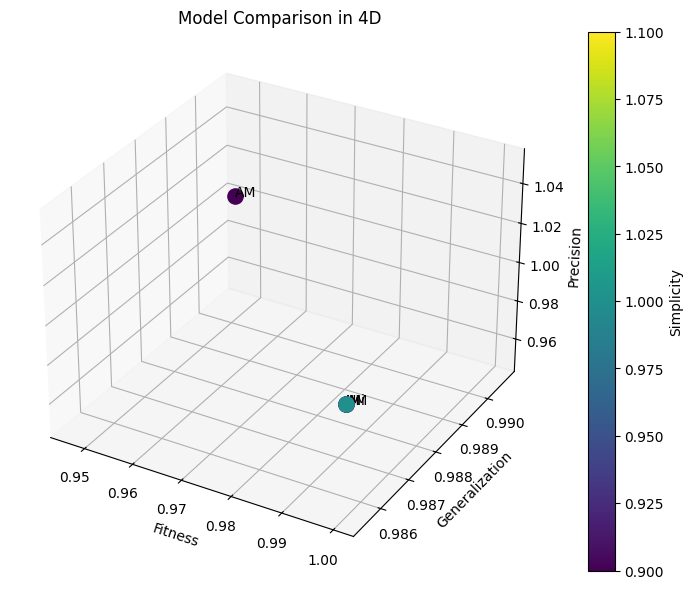

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_2.csv


replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

MinerType AM


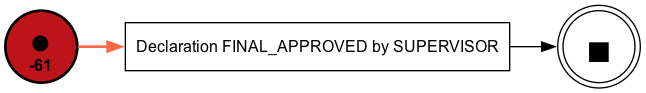

MinerType HM


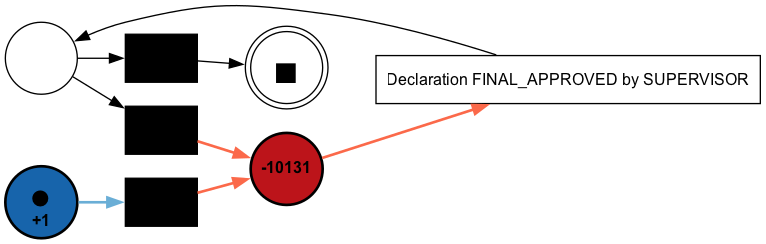

MinerType IM


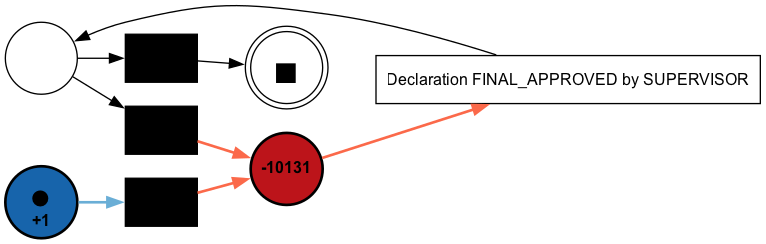

MinerType IMi


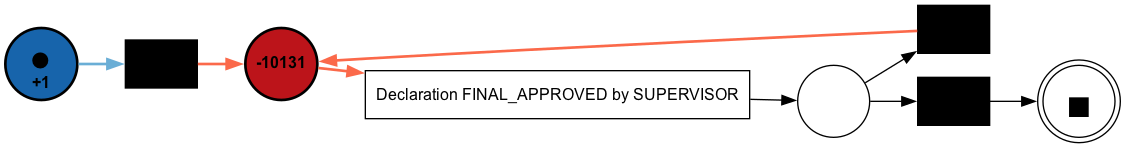

===== Pareto Efficient Models for log: sublogs_2_with_4d =====


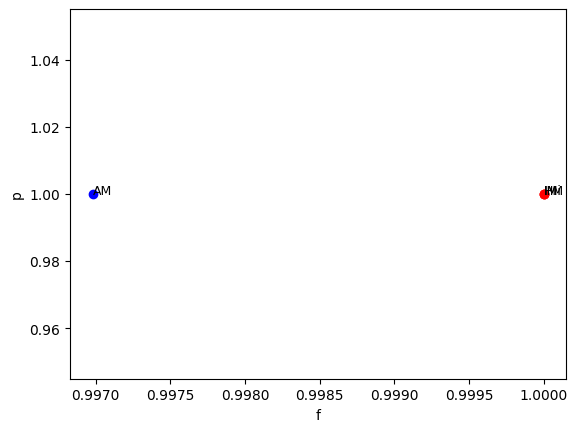

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


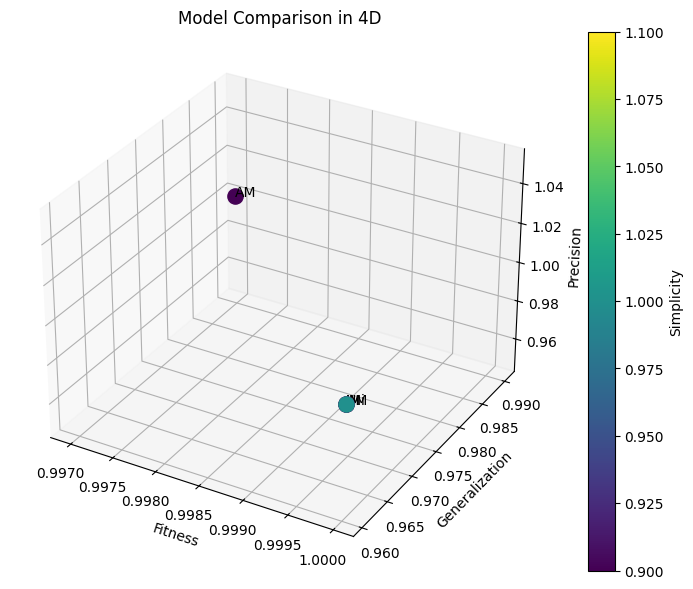

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_3.csv
MinerType AM


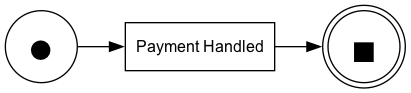

MinerType HM


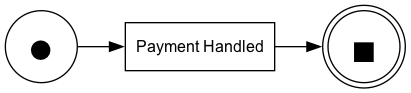

MinerType IM


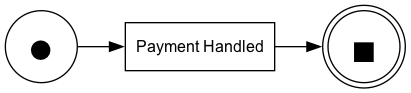

MinerType IMi


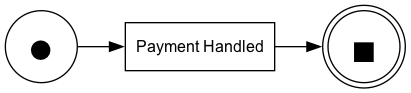

===== Pareto Efficient Models for log: sublogs_3_with_4d =====


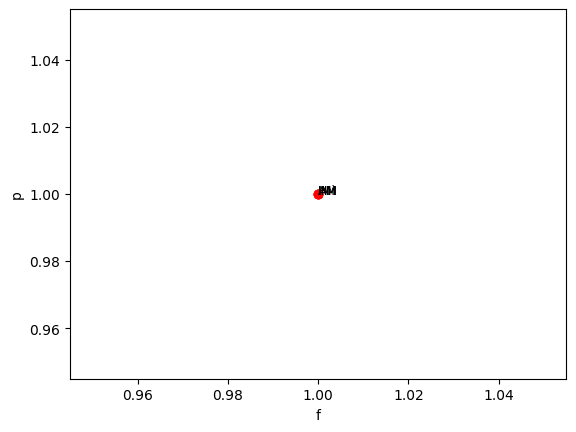

[{'type': 'AM', 'f': 1.0, 'p': 1.0}, {'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


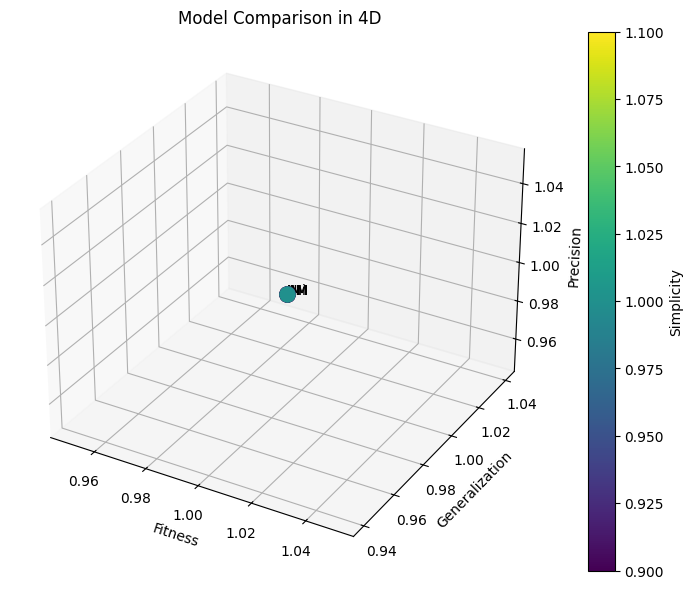

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_4.csv
MinerType AM


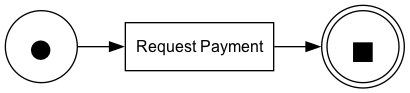

MinerType HM


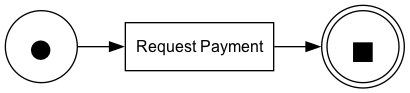

MinerType IM


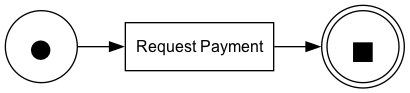

MinerType IMi


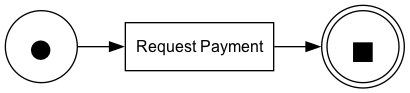

===== Pareto Efficient Models for log: sublogs_4_with_4d =====


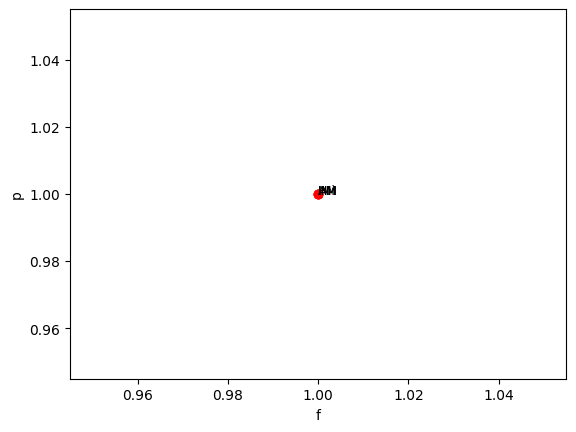

[{'type': 'AM', 'f': 1.0, 'p': 1.0}, {'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


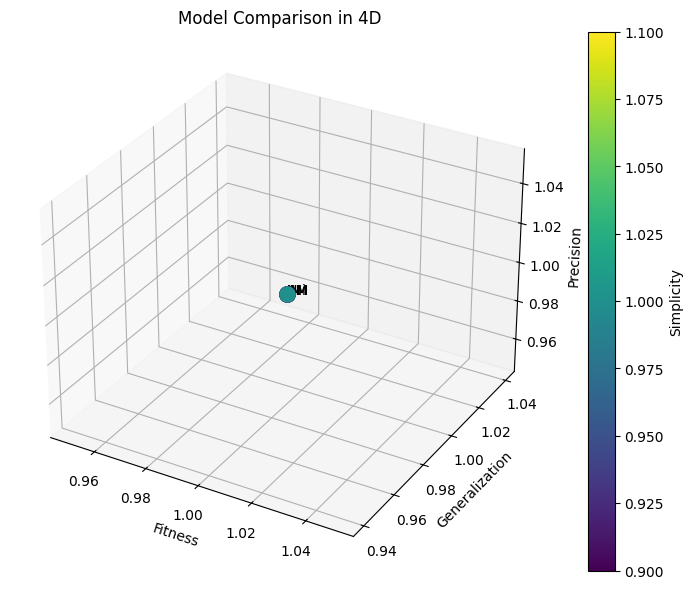

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_5.csv


replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

MinerType AM


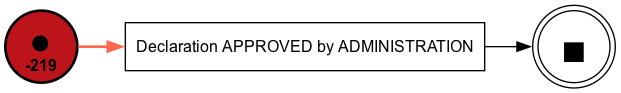

MinerType HM


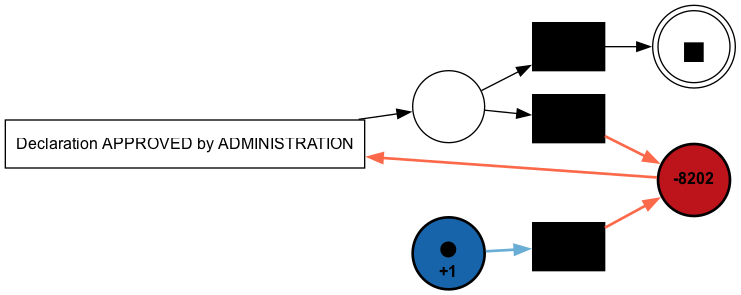

MinerType IM


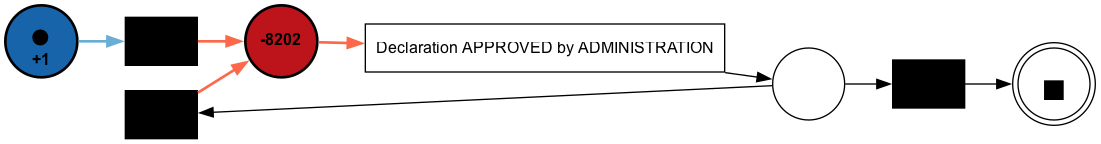

MinerType IMi


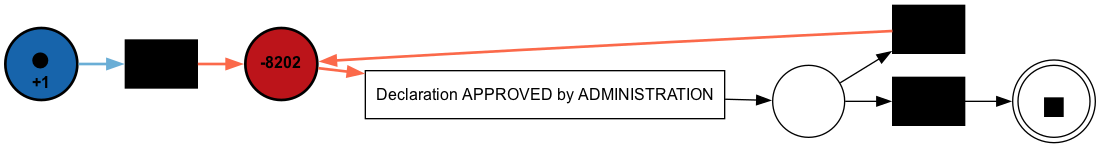

===== Pareto Efficient Models for log: sublogs_5_with_4d =====


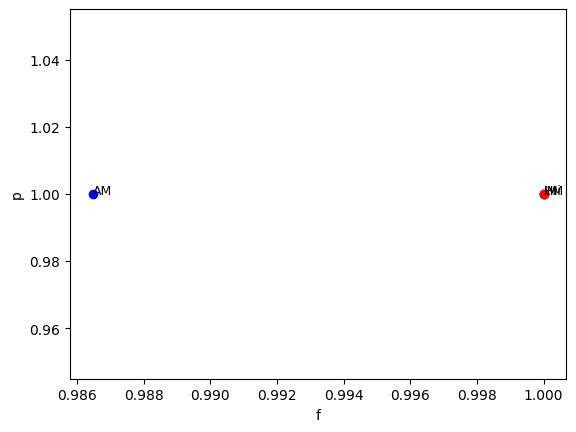

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


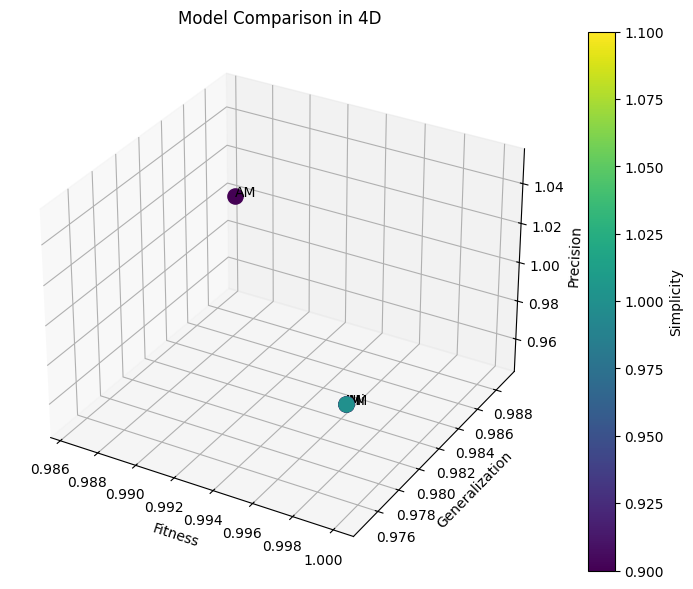

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_6.csv


replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

MinerType AM


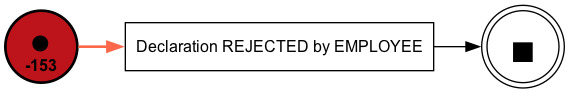

MinerType HM


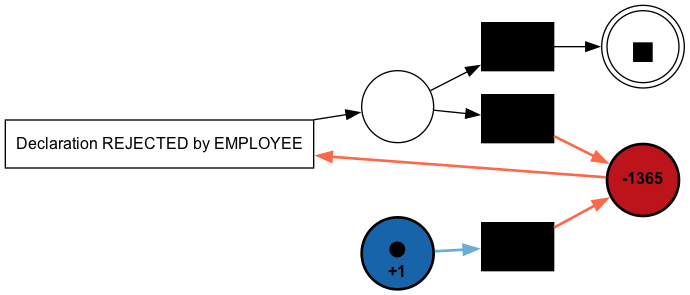

MinerType IM


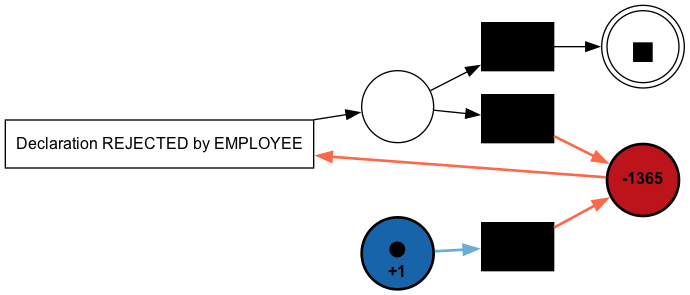

MinerType IMi


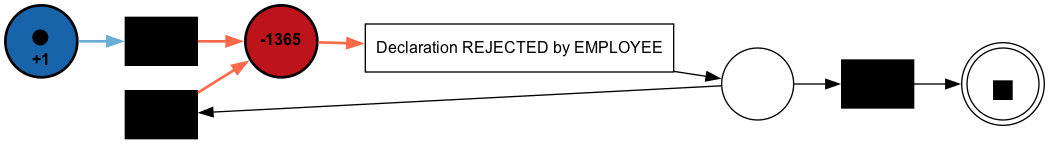

===== Pareto Efficient Models for log: sublogs_6_with_4d =====


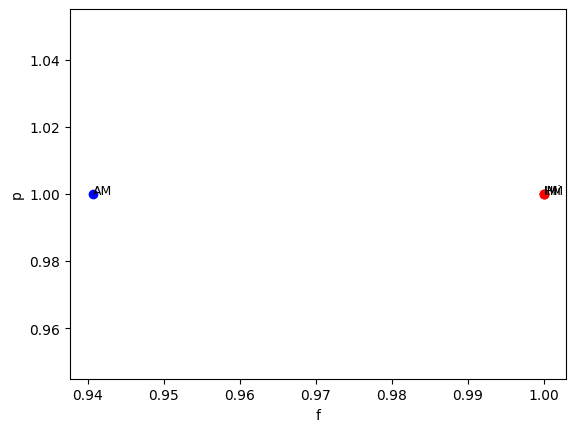

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


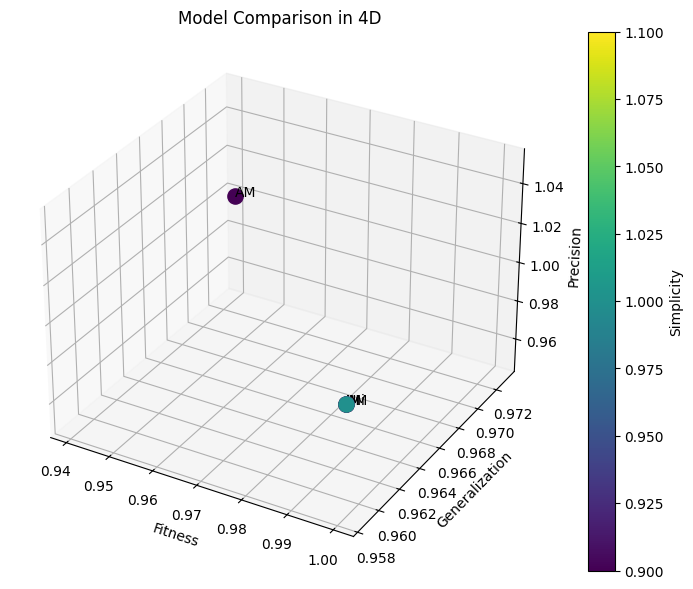

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_7.csv


replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

MinerType AM


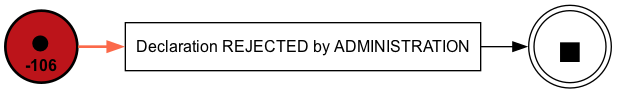

MinerType HM


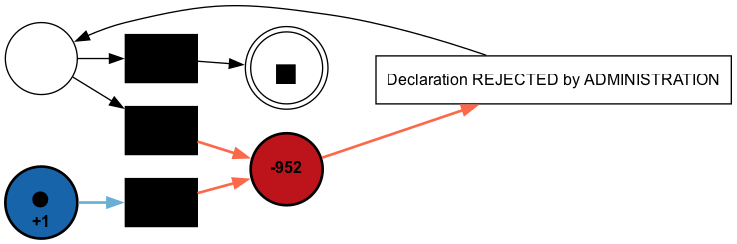

MinerType IM


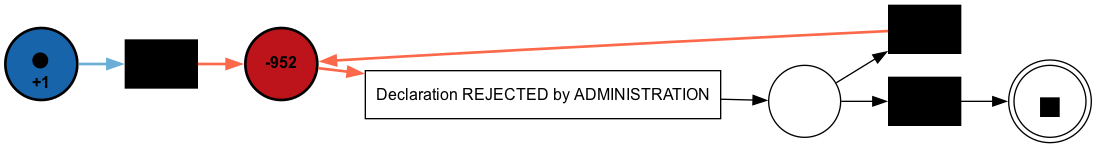

MinerType IMi


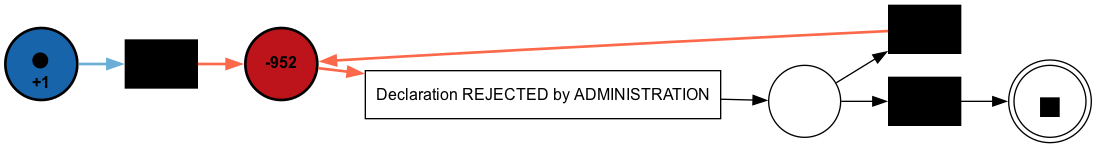

===== Pareto Efficient Models for log: sublogs_7_with_4d =====


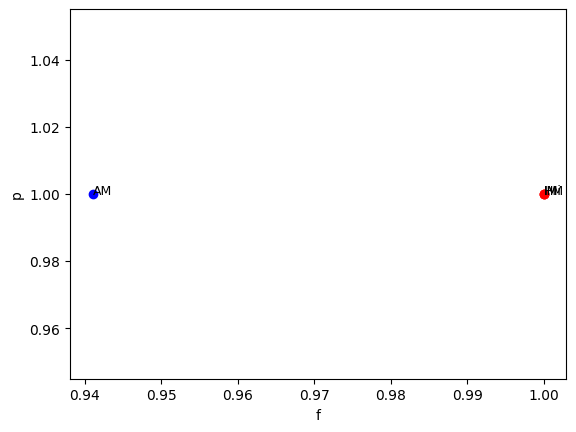

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


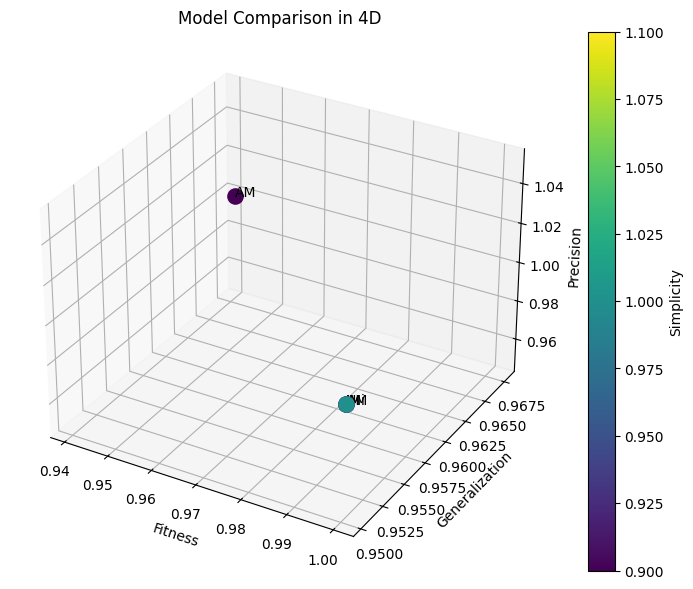

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_8.csv


replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

MinerType AM


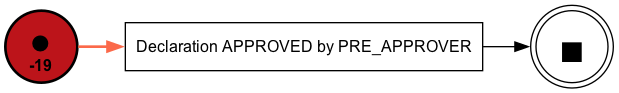

MinerType HM


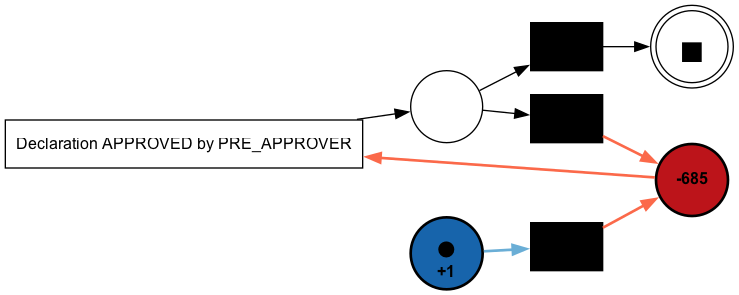

MinerType IM


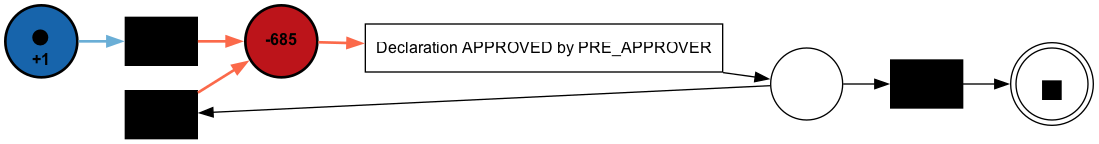

MinerType IMi


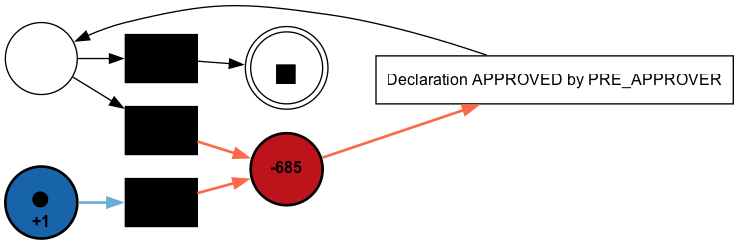

===== Pareto Efficient Models for log: sublogs_8_with_4d =====


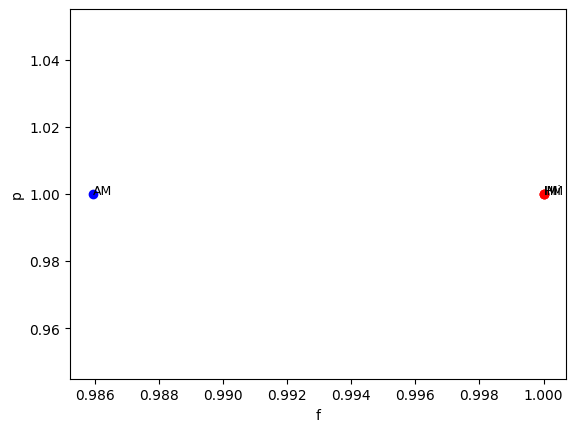

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


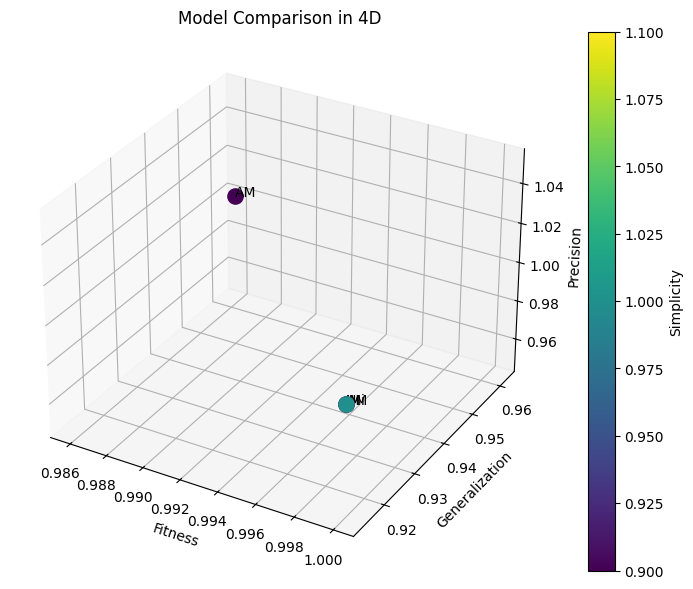

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']
file_path ====== /Users/dilemma/Desktop/LMU_Process_Mining_SoSe24/practical/ProcessMining/group1/task5/base_approach/cluster_9.csv


replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

MinerType AM


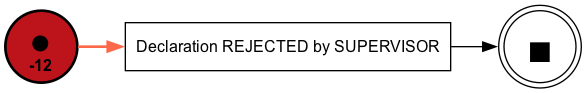

MinerType HM


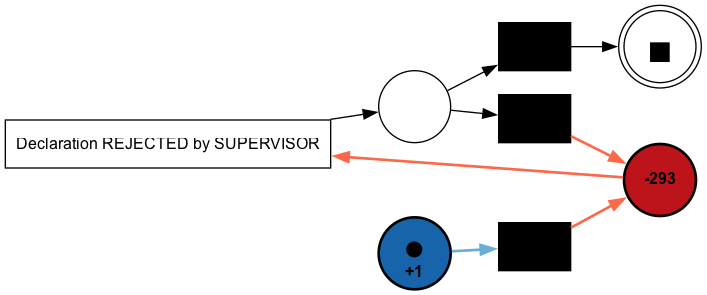

MinerType IM


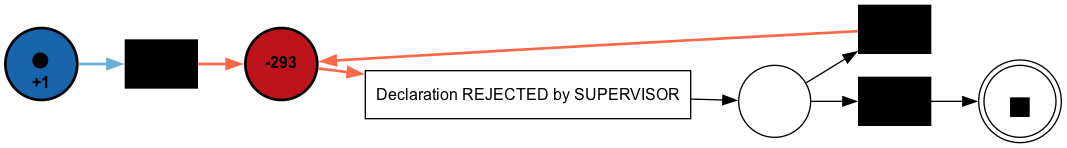

MinerType IMi


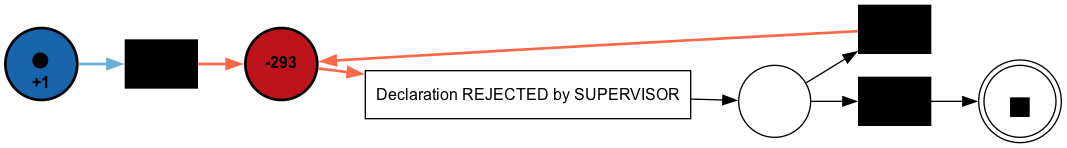

===== Pareto Efficient Models for log: sublogs_9_with_4d =====


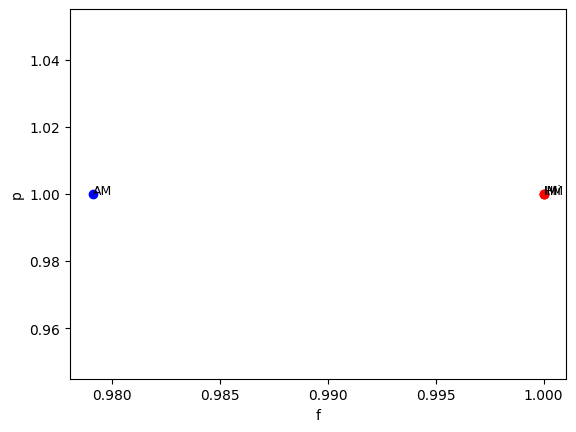

[{'type': 'HM', 'f': 1.0, 'p': 1.0}, {'type': 'IM', 'f': 1.0, 'p': 1.0}, {'type': 'IMi', 'f': 1.0, 'p': 1.0}]
===== Pareto Efficient Models with 4 Dimensions for log: Basic_real_eventlog_with_4d =====


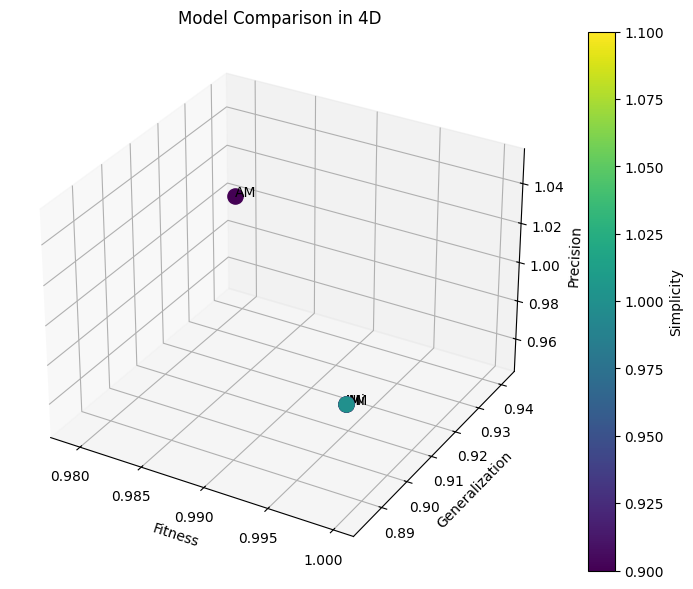

4D Pareto Efficient Models:  ['AM', 'HM', 'IM', 'IMi']


In [24]:
current_dir = os.getcwd()
sublogs_path = os.path.join(current_dir, 'base_approach')
compare_sub_logs(sublogs_path,'f','p',0.25)